# Image Processing and Open CV

## Installing Open CV
### 1- Install Python
#### Widnows
[How to Install Python For Windows](https://www.geeksforgeeks.org/how-to-install-python-on-windows/)
#### Linux 
`sudo apt-get install python`
#### Mac 
`brew install python`

### 2- Install `pip`
#### Windows
`python get-pip.py`

#### Linux
`sudo apt-get install python3-pip python-dev`

### 3- Install Open CV
`pip3 install opencv-python`

In [139]:
!pip install opencv-python # installing python in the current environment


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


## Load Open CV module 

In [21]:
import cv2 as cv

## Reading Image

In [141]:
img = cv.imread('pic2_butterfly.jpeg')

In [142]:
print (img.shape)
print(img[0,0])

(428, 750, 3)
[ 37 110 170]


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

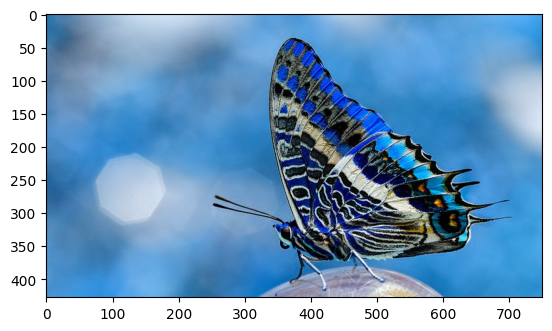

In [144]:
# cv.imshow('butterfly', img)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(img)

In [145]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img[0][0])

[170 110  37]


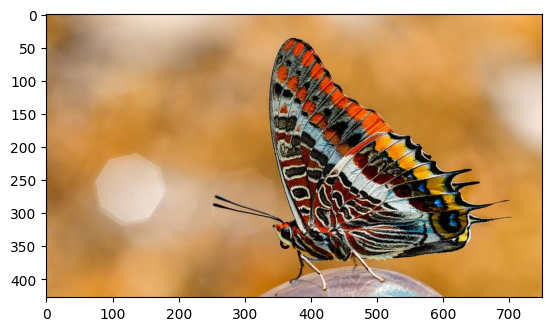

In [146]:
plt.imshow(img)

In [147]:
img_gry = cv.imread('pic2_butterfly.jpeg', 0)
print(img_gry[0,0])

120


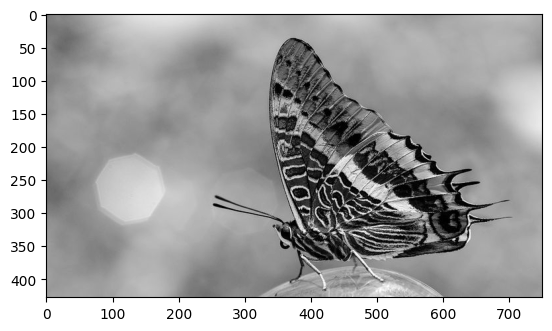

In [148]:
plt.imshow(img_gry, cmap='gray')

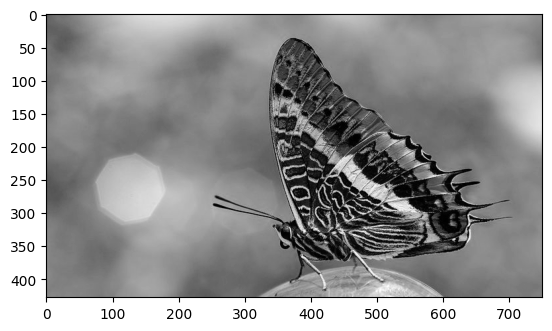

In [149]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2GRAY), cmap='gray')

In [150]:
print(type(img))

<class 'numpy.ndarray'>


In [1]:
part_img = img[240:400,250:400]
print(part_img.shape)
plt.imshow(part_img)

NameError: name 'img' is not defined

## Image Writting

In [152]:
cv.imwrite('butterflyhead.jpg', part_img)

True

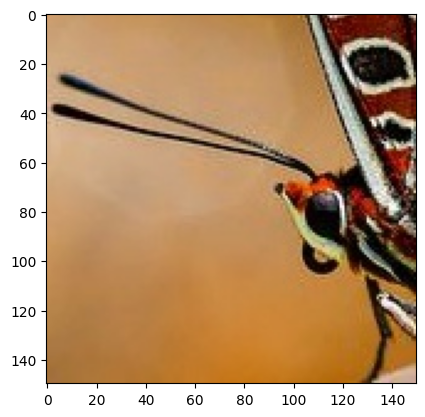

In [153]:
plt.imshow(cv.imread('butterflyhead.jpg'))

## Arithmetic Operations on Images

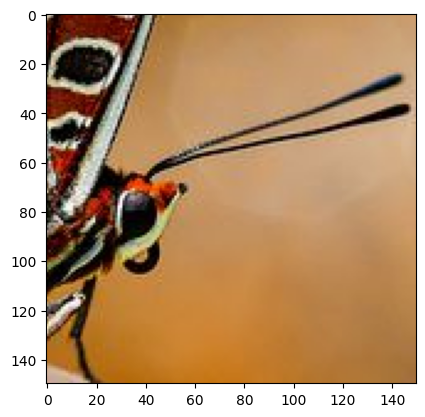

In [154]:
flip_part_img = cv.flip(part_img,1)
plt.imshow(flip_part_img)

In [155]:
import numpy as np

[187 160 124]
[255 255 251]
[188 161 125]


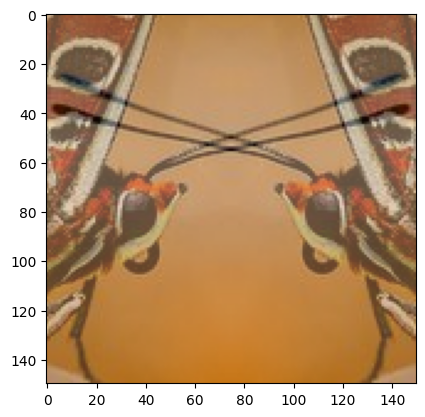

In [156]:
total_part_img = cv.addWeighted(part_img, .50,flip_part_img, .49, 0)
plt.imshow(total_part_img)
print(total_part_img[0,0])


total_part_img = cv.add(part_img, flip_part_img)
plt.imshow(total_part_img)
print(total_part_img[0,0])

total_part_img = (part_img.astype(np.int32) + flip_part_img.astype(np.int32))/2
total_part_img = total_part_img.astype(np.uint8)
plt.imshow(total_part_img)
print(total_part_img[0,0])


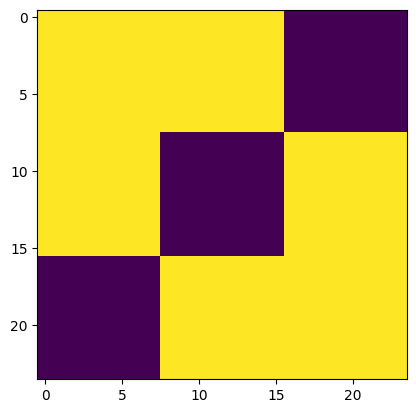

In [157]:
import numpy as np
rec1 = np.zeros((24,24), dtype=np.uint8)
rec2 = np.zeros((24,24), dtype=np.uint8)
rec1 [:16,:16] = 255
# plt.imshow(rec1)

rec2 [8:,8:] = 255
# plt.imshow(rec2)

sub1 = cv.subtract(rec1, rec2)
# plt.imshow(sub1)

sub2 = cv.subtract(rec2, rec1)
plt.imshow(sub2)


plt.imshow(sub1+sub2)

## Image Resizing

(428, 750, 3)
(43, 75, 3)


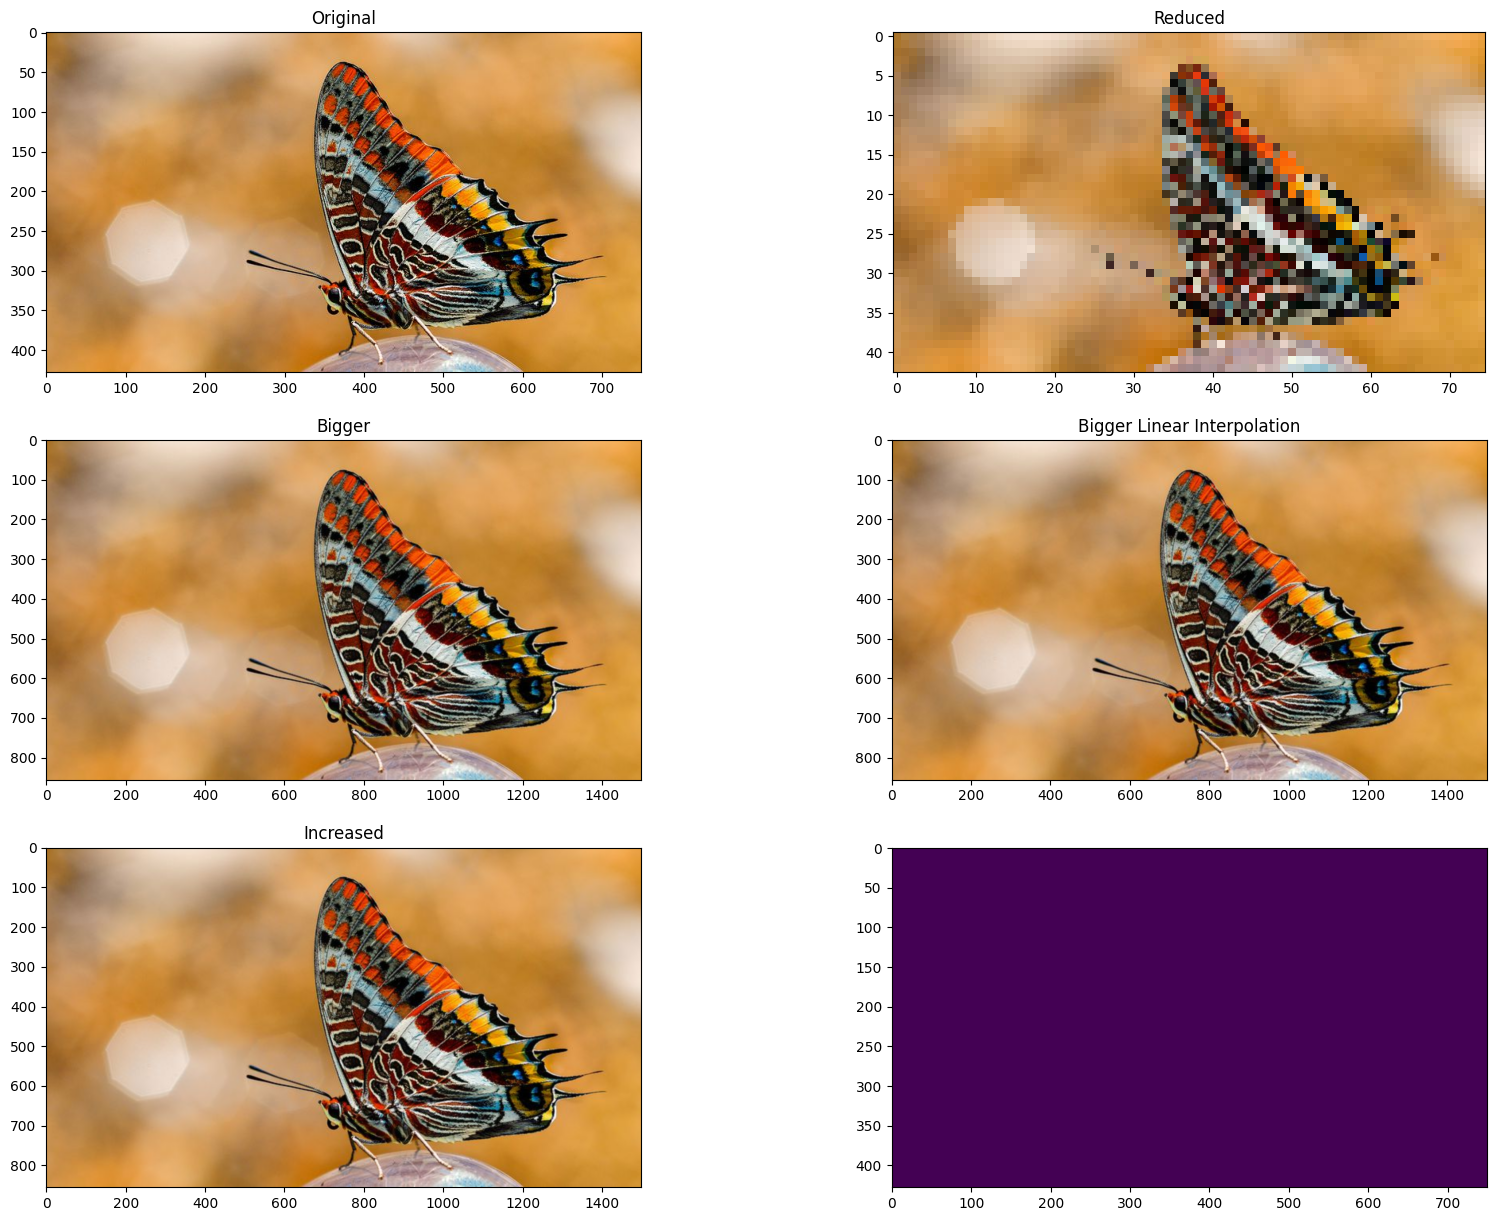

In [158]:
red_img = cv.resize(img, (0,0), fx=.1, fy=.1)
# plt.imshow(half_img)
print (img.shape)

print (red_img.shape)
fig, ax = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(20)
ax[0,0].imshow(img)
ax[0,0].set_title('Original')

ax[0,1].imshow(red_img)
ax[0,1].set_title('Reduced')

bigger = cv.resize(img, (1500,856))
ax[1,0].imshow(bigger)
ax[1,0].set_title('Bigger')

stretch_near = cv.resize(img, (1500,856), interpolation = cv.INTER_LINEAR)
ax[1,1].imshow(stretch_near)
ax[1,1].set_title('Bigger Linear Interpolation')

inc_img = cv.resize(img, (0,0), fx=2, fy=2)
ax[2,0].imshow(inc_img)
ax[2,0].set_title('Increased')

ax[2,1].imshow(np.zeros((428,750)))

## Bluring Image
- helps in Noise removal.
- helps in smoothing the image.
- low intensity edges are removed.
- helps in hiding the details when necessary. For e.g. in many cases police deliberately want to hide the face of the victim, in such cases blurring is required.

### Types of Blurring:
**Gaussian Blurring:**  
- widely used effect in graphics software
- reduce image noise and reduce detail
- used as a preprocessing stage before applying our machine learning

**Median Blur:** 
- non-linear digital filtering technique
- used to remove noise from an image or signal.
- it preserves edges while removing noise.

**Bilateral Blur:** 
- non-linear, edge-preserving
- noise-reducing smoothing filter
- replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels
- sharp edges are preserved while discarding the weak ones.

Text(0.5, 1.0, 'Bilateral Blur')

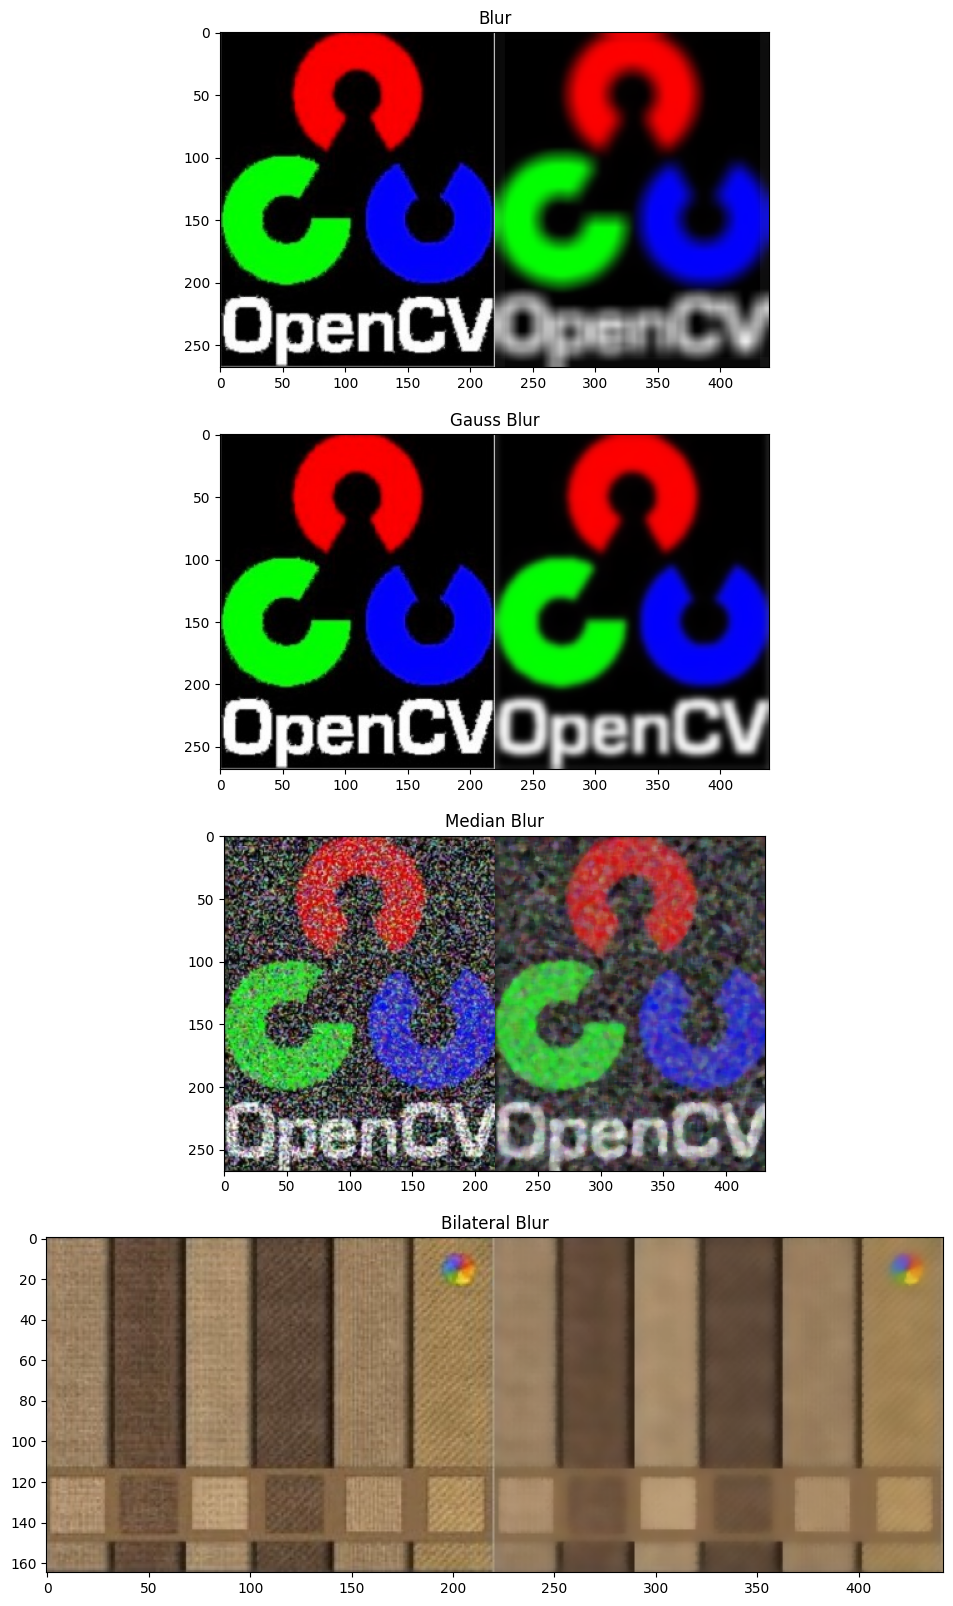

In [159]:
im = cv.imread('openCV.jpg')
im_sp = cv.imread('openCV_saltpapper.jpg')
im_se = cv.cvtColor(cv.imread('openCV_sharpedges.jpg'), cv.COLOR_BGR2RGB)


blur_img = cv.blur(im, (15,15))
blur_gauss = cv.GaussianBlur(im, (15,15), 0)
blur_med   = cv.medianBlur(im_sp, 5)
blur_bilat = cv.bilateralFilter(im_se, 9, 75, 75)

fix, ax = plt.subplots(4,1, figsize=(20,20))
ax[0].imshow(np.concatenate((im, blur_img),1))
ax[0].set_title('Blur')
ax[1].imshow(np.concatenate((im, blur_gauss),1))
ax[1].set_title('Gauss Blur')
ax[2].imshow(np.concatenate((im_sp, blur_med),1))
ax[2].set_title('Median Blur')
ax[3].imshow(np.concatenate((im_se, blur_bilat),1))
ax[3].set_title('Bilateral Blur')

## Image Rotation

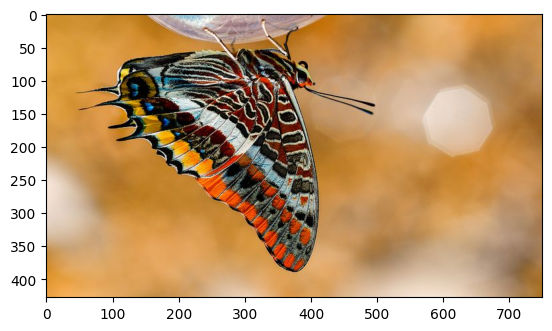

In [160]:
plt.imshow(img)
rot_img = cv.rotate(img,cv.ROTATE_180) # ROTATE_90_CLOCKWISE, ROTATE_90_COUNTERCLOCKWISE
plt.imshow(rot_img)

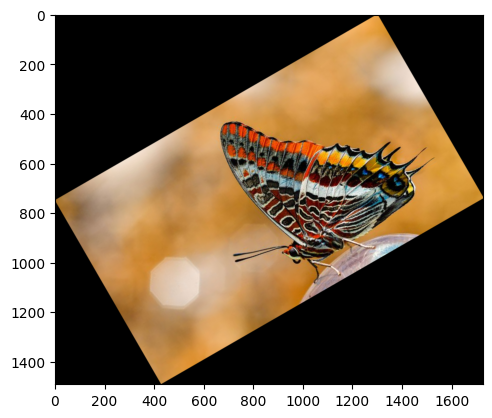

In [161]:
h,w = img.shape[:2]
c = (w/2, h/2)
s = 2
a = 30
rot_mat = cv.getRotationMatrix2D(center=c, angle=a, scale=s)

 #choose a new image size.

new_h,new_w = h*s,w*s
#include this if you want to prevent corners being cut off
r = np.deg2rad(a)
new_h,new_w = (abs(np.sin(r)*new_w) + abs(np.cos(r)*new_h),abs(np.sin(r)*new_h) + abs(np.cos(r)*new_w))


(tx,ty) = ((new_h-h)/2,(new_w-w)/2)
rot_mat[0,2] += ty #third column of matrix holds translation, which takes effect after rotation.
rot_mat[1,2] += tx
rot2_img  = cv.warpAffine(img, rot_mat, (int(new_w),int(new_h)))
plt.imshow(rot2_img)


## Image Edge Detection

Text(0.5, 1.0, 'Edges from blurred Image')

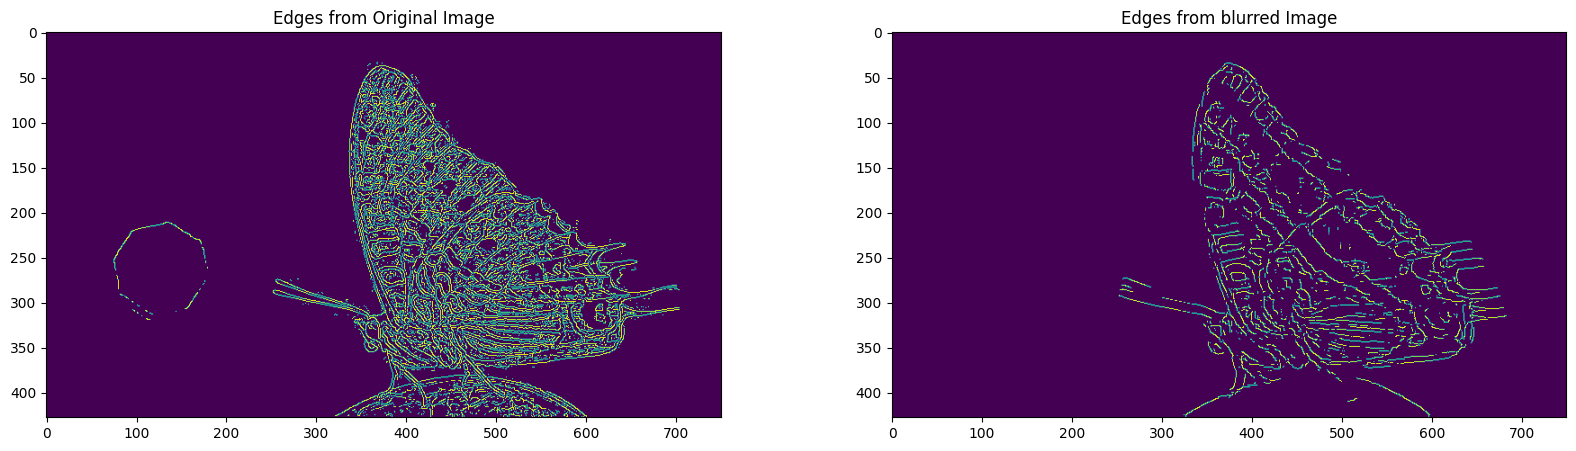

In [162]:
blur = cv.blur(img, (10,10))
edge = cv.Canny(image=img, threshold1=100, threshold2=100)
edge_blur = cv.Canny(image=blur, threshold1=100, threshold2=100)

fig, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].imshow(edge)
ax[0].set_title('Edges from Original Image')
ax[1].imshow(edge_blur)
ax[1].set_title('Edges from blurred Image')

## Morphological Image Processing

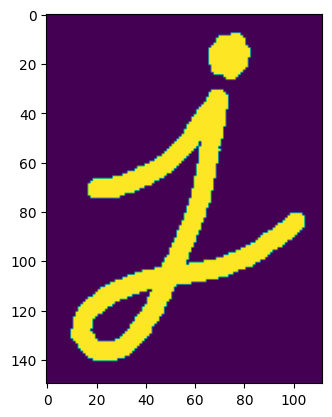

In [163]:
j_img = cv.imread('j_image.png', 0)
k = np.ones((5,5), dtype=np.uint8)
plt.imshow(j_img)

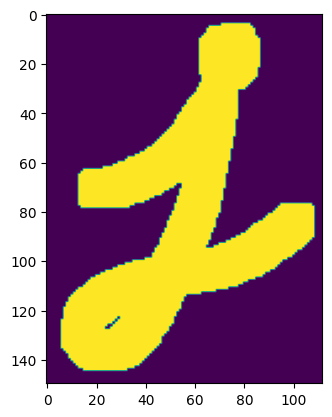

In [164]:
''' ** Dialation ** '''
dialated = cv.dilate(j_img, k, iterations=2)
plt.imshow(dialated)

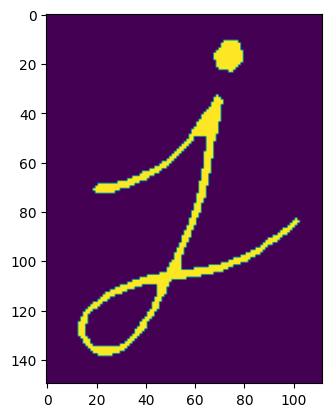

In [165]:
''' ** Erode ** '''
eroded = cv.erode(j_img, k, iterations=1)
plt.imshow(eroded)

Text(0.5, 1.0, 'Dot-Free J')

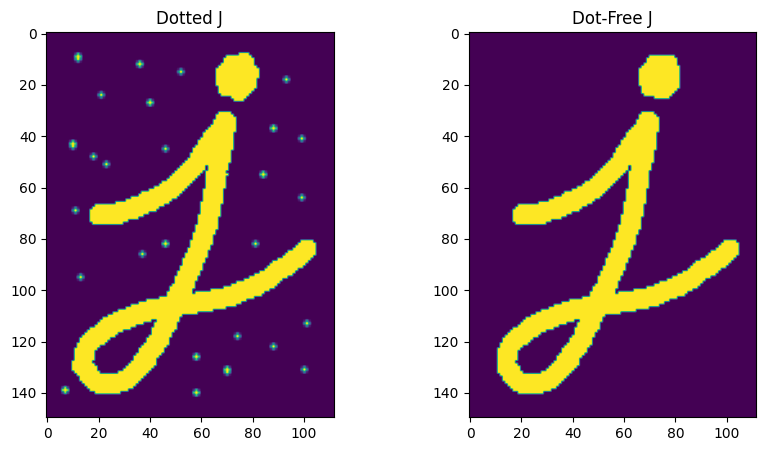

In [166]:
''' ** Openning: Erosion Then Dialation ** '''
j_doted = cv.imread('j_doted.png', 0)
j_opened = cv.morphologyEx(j_doted, cv.MORPH_OPEN, k)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(j_doted)
ax[0].set_title('Dotted J')
ax[1].imshow(j_opened)
ax[1].set_title('Dot-Free J')

Text(0.5, 1.0, 'Frackle-Free J')

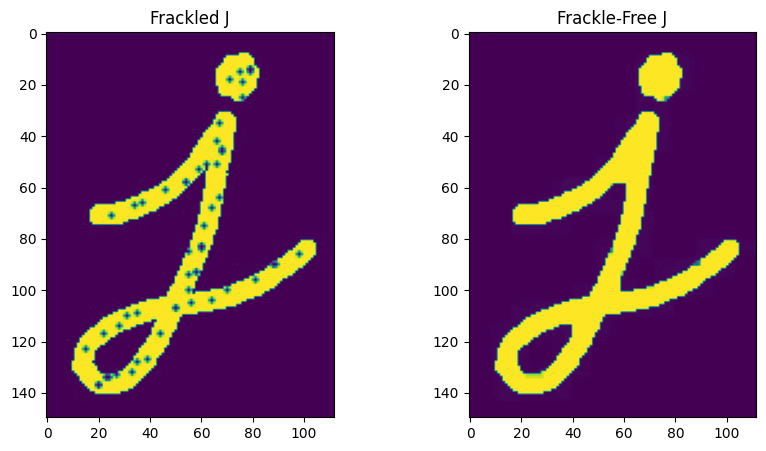

In [167]:
''' ** Closing: Dialation Then Eorosion** '''
j_frackles = cv.imread('j_freckles.jpg', 0)
j_closed = cv.morphologyEx(j_frackles, cv.MORPH_CLOSE, k)

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(j_frackles)
ax[0].set_title('Frackled J')
ax[1].imshow(j_closed)
ax[1].set_title('Frackle-Free J')

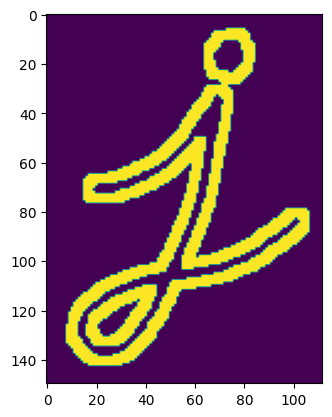

In [168]:
''' ** Gradient: Difference between Dialation and Eorosion** '''
j_frackles = cv.imread('j_freckles.jpg', 0)
j_grad = cv.morphologyEx(j_img, cv.MORPH_GRADIENT, k)

plt.imshow(j_grad)

## Dropping Channels

Text(0.5, 1.0, 'Blue Image')

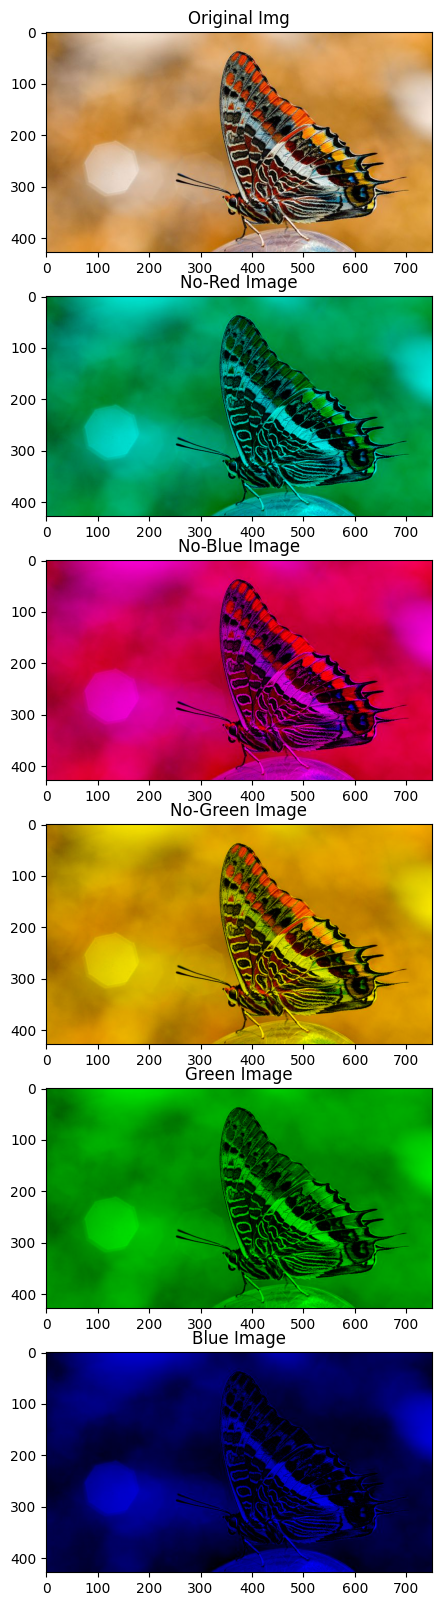

In [191]:
img_no_red = img.copy()
img_no_red[:,:,0] = 0

img_no_blue = img.copy()
img_no_blue[:,:,1] = 0

img_no_green = img.copy()
img_no_green[:,:,2] = 0

img_green = img.copy()
img_green[:,:,(0,2)] = 0

img_red = img.copy()
img_red[:,:,(1,2)] = 0

img_blue = img.copy()
img_blue[:,:,0:2] = 0

fig, ax = plt.subplots(6,1, figsize=(20,20))
ax[0].imshow(img)
ax[0].set_title('Original Img')
ax[1].imshow(img_no_red)
ax[1].set_title('No-Red Image')
ax[2].imshow(img_no_blue)
ax[2].set_title('No-Blue Image')
ax[3].imshow(img_no_green)
ax[3].set_title('No-Green Image')
ax[4].imshow(img_green)
ax[4].set_title('Green Image')
ax[5].imshow(img_blue)
ax[5].set_title('Blue Image')

## Image Histogram

Text(0, 0.5, 'Number of Pixels (Frequency)')

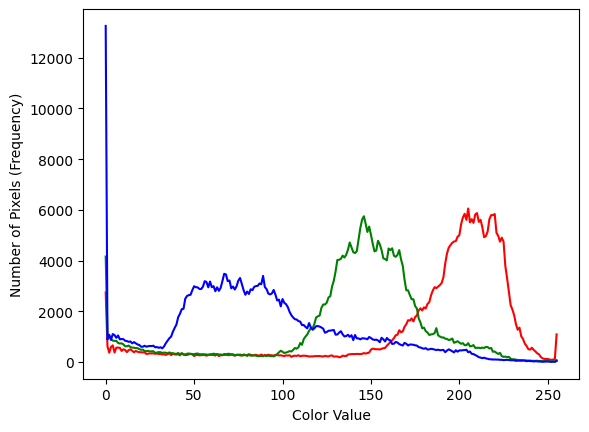

In [208]:
color = ['r', 'g', 'b']
for i, c in enumerate(color):
    hist = cv.calcHist([img], channels=[i], mask=None, histSize=[256], ranges=[0,256])
    plt.plot(hist, color=c)
plt.xlabel('Color Value')
plt.ylabel('Number of Pixels (Frequency)')

## Image Processing and Machine Learning: Optical Character Recognition (ORC)

In [217]:
!pip install pytesseract
## You will have to install tesseract: https://tesseract-ocr.github.io/tessdoc/Installation.html
## If using:
## - MAC: brew install tesseract
## - Linux sudo apt install tesseract-ocr; sudo apt install libtesseract-dev
## - Windows: you're on your own :-P


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [214]:
import pytesseract as pt

Vt gemini inter fe reges albusque, niger que

P ro laude oppofiti certent bicoloribus armis,

Dicite Seriades Nympbee certamina tanta

C arminibus pror{us watum illibata priorum.

Nulla via off. tamen tre tnuat, quo me rapit ardor,



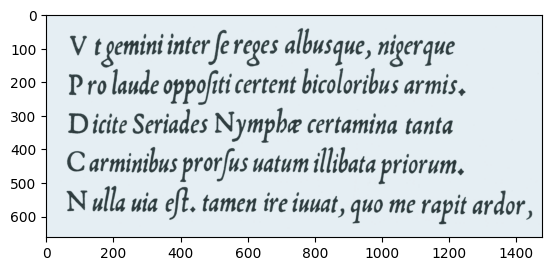

In [216]:
txt_im = cv.imread('Arrighi_italic.png')
plt.imshow(txt_im)
string = pt.image_to_string(txt_im)
print(string)

# Data Augmentation 
## Using Albumentations module: https://albumentations.ai/docs/

In [222]:
!pip install albumentations


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


{0, 255}


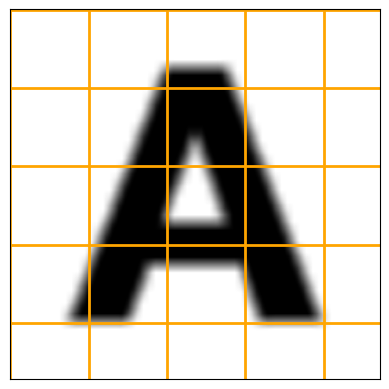

In [176]:
a = cv.imread('letter_a.jpg', 0)

x = a.ravel()

for i,k in enumerate(x):
    if k<255:
        x[i] = abs(k-255)
x[x<255]= 0
# x[x==255] = 2
print(set(x))
a = cv.blur(a, (20,20))

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
plt.grid(linewidth=2, color='orange')
plt.imshow(a, cmap='gray')
plt.savefig('letter_a_grid.jpg')



In [177]:
import albumentations as A

In [994]:
transform = A.Compose([
                # A.RandomCrop(width=256, height=256),
                # A.HorizontalFlip(p=0.5),
                # A.RandomBrightnessContrast(p=0.2),
                # A.GridDistortion(p=.99),
                A.ElasticTransform(p=0.99,alpha=99, sigma=8),
                # A.MotionBlur(p=6),
                # A.Rotate(p=0.4),
                # A.Transpose(p=.6),
                # A.RandomGridShuffle(p=0.6),
            ])

In [905]:
a = cv.imread('letter_a_grid.jpg', 0)
# a = cv.resize(a, (0,0), fx=3.0, fy=3.0)

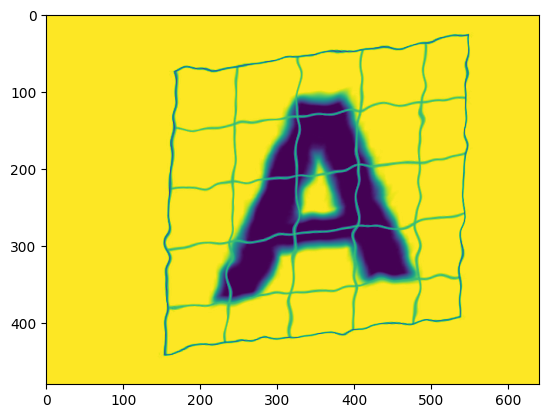

In [1003]:
transformed = transform(image=a)
t = transformed["image"]
plt.imshow(t)